In [3]:
import json
import numpy as np
import proplot as pplt

%matplotlib inline

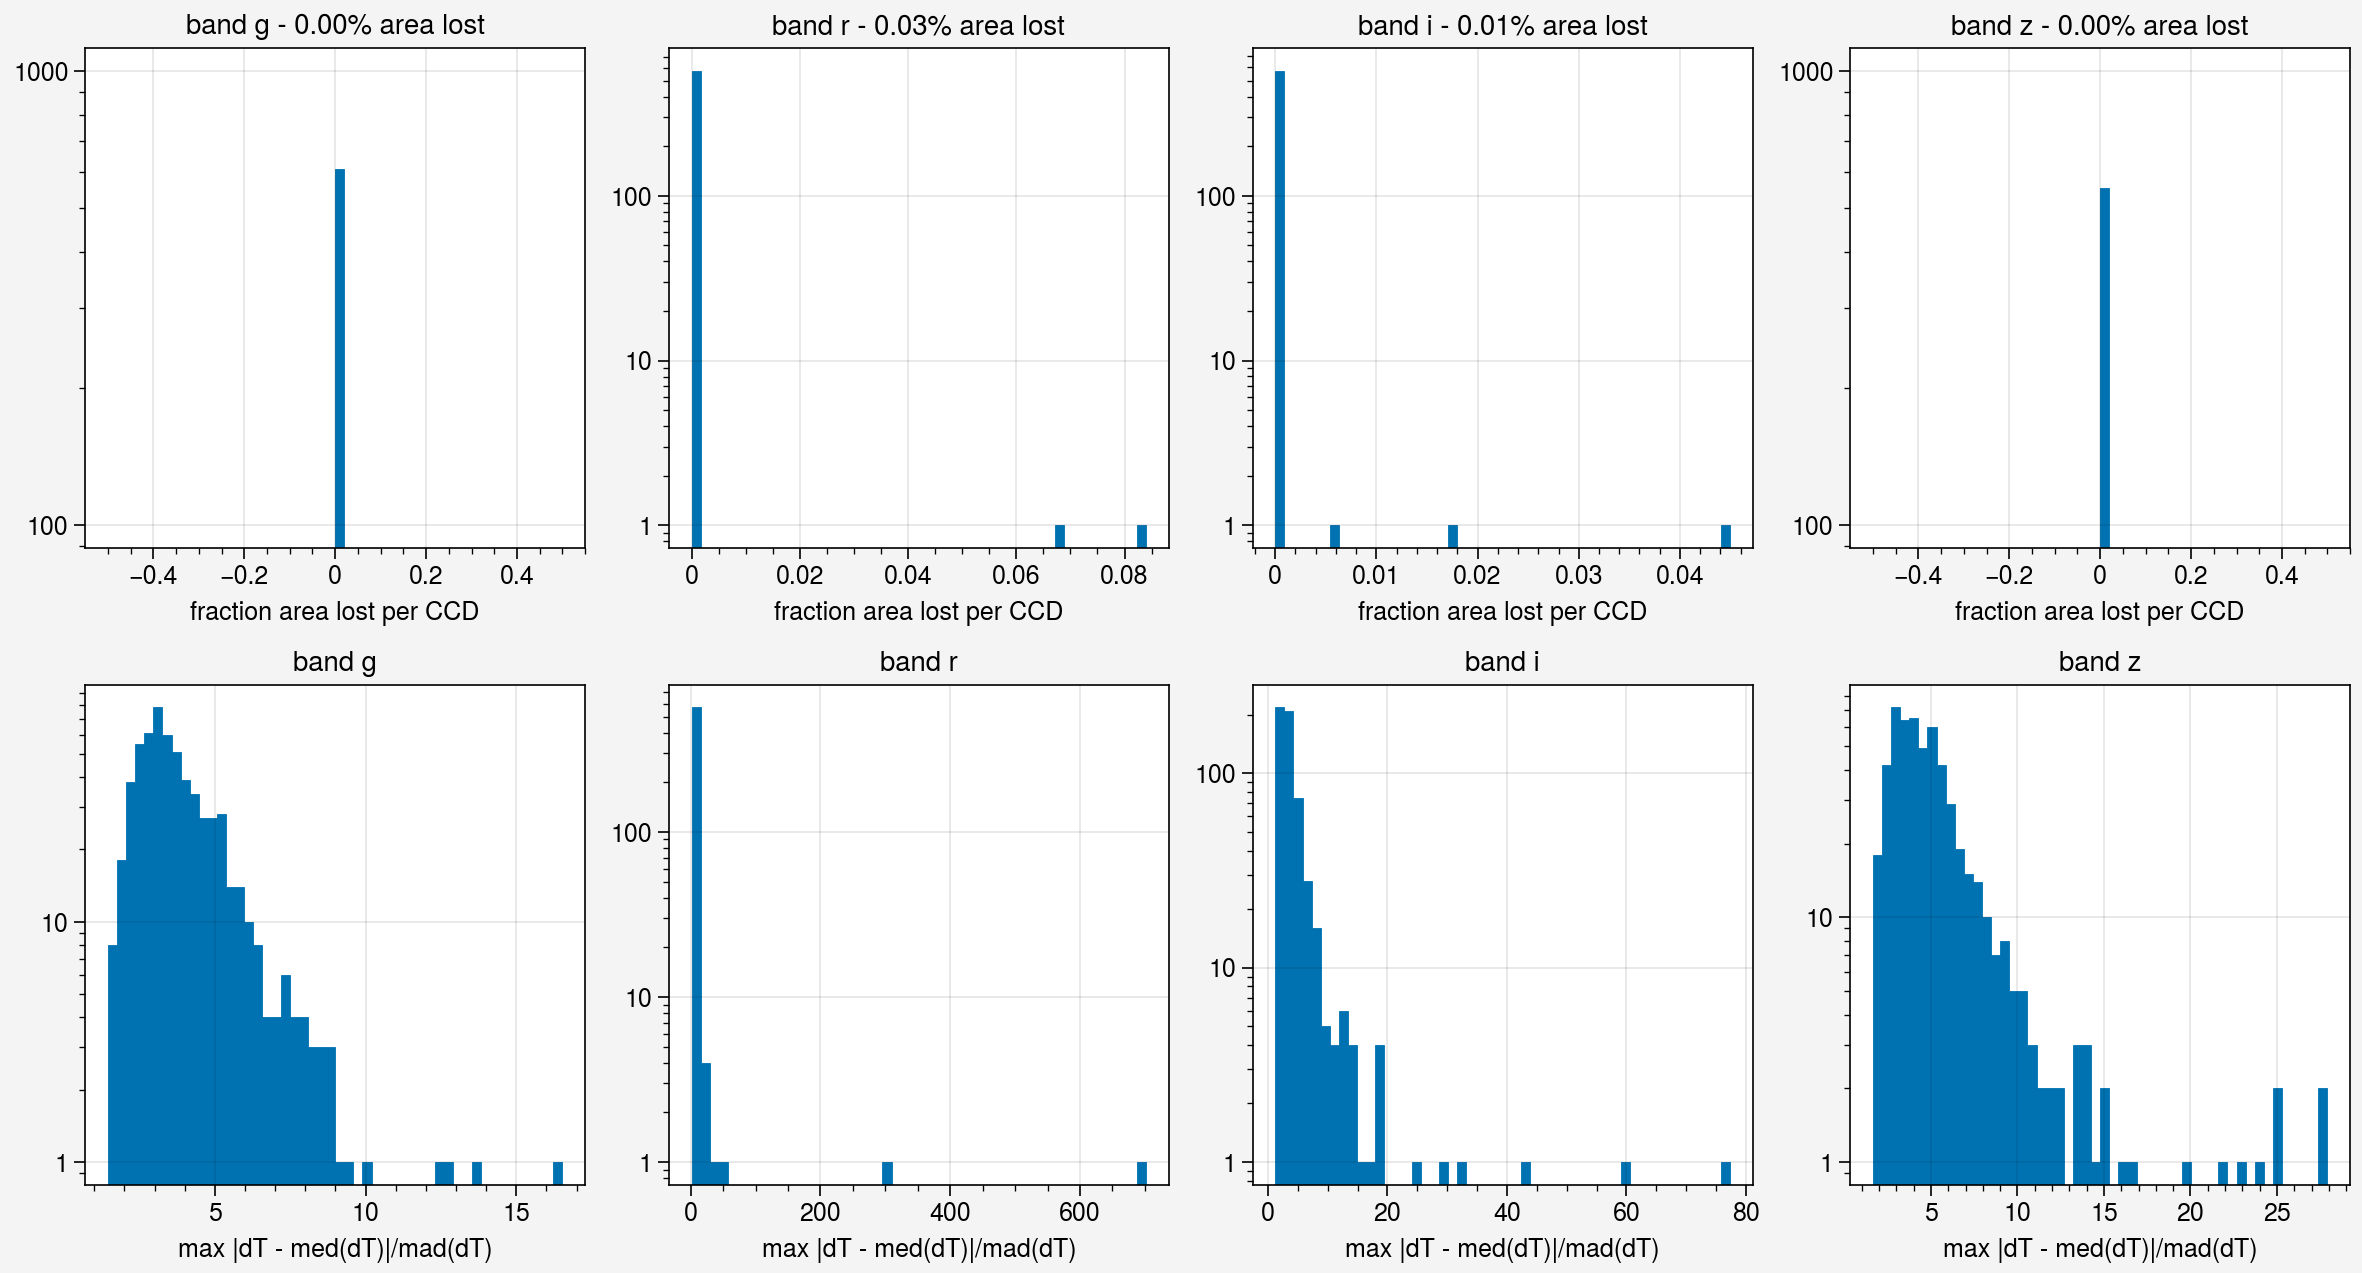

In [39]:
import json

with open("data.json", "r") as fp:
    data = json.load(fp)

mdevs = {}
bfs = {}
for band in ["g", "r", "i", "z"]:
    bfs[band] = []
    mdevs[band] = []
    for tname, bd in data.items():
        if band in bd:
            for _, res in bd[band].items():
                bfs[band].append(res["bad_frac"])
                mdevs[band].append(res["maxdev"])

fig, axs = pplt.subplots(nrows=2, ncols=4, share=0)

for i, band in enumerate(["g", "r", "i", "z"]):
    if len(bfs[band]) > 0:
        axs[0, i].hist(bfs[band], bins=50, log=True)
        axs[0, i].set_title("band %s - %0.2f%% area lost" % (band, np.sum(bfs[band])/len(bfs[band])*100))
        axs[0, i].set_xlabel("fraction area lost per CCD")
        
for i, band in enumerate(["g", "r", "i", "z"]):
    if len(mdevs[band]) > 0:
        axs[1, i].hist(mdevs[band], bins=50, log=True)
        axs[1, i].set_title("band %s" % (band,))
        axs[1, i].set_xlabel("max |dT - med(dT)|/mad(dT)")